[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/optimization-II-2021/blob/master/notebooks/week0.ipynb)

# Week 0

Throughout this course we will be using Jupyter notebooks. Please read this page to familiarize yourself with them.

## Jupyter notebooks

Jupyter is a useful platform for writing and excecuting code interactively in Python. Jupyter also works with other languages, notably Julia and R. (In fact Jupyter is short for Julia-Python-R). 

With Jupyter notebooks you can write and excecute code piece by piece, and you can also mix code with rich text. The rich text uses Markdown as markup language, and has full support for $\LaTeX$ to write equations. For example, this entire page is itself a Jupyter notebook!

## Google Colab

You can run and edit Jupyter notebooks from your browser without any installation using [Google Colab](https://colab.research.google.com/). You can also click the button `Open in Colab` at the top of this page to open this page itself as a notebook. On Colab all the Python packages you will need will already be installed. The notebooks all run on a server, so it doesn't matter how powerful your computer is. After editing a notebook the most convenient way to save it is by saving it onto Google Drive. If you do not want to do this, you can also download / upload the notebook as a `.ipynb` file.

## Local usage

You can skip this section if you just want to use Jupyter from Colab.

If you want to run Jupyter notebooks on your own computer, you first need to install Python and Jupyter. The easiest way to do this is by downloading [Anaconda](
https://www.anaconda.com/products/individual#Downloads). Anaconda is a Python distribution that already has a large amount of useful packages preinstalled. 

After installing Anaconda you can launch Jupyter as an application. You can also use Anaconda to download and manage packages using a graphical user interface. 

Alternatively, Anaconda can be used from the command line. If you want to do this, then after installing Anaconda, make sure it is properly added to `$PATH`. The easiest way to do this is to run the command
```
conda init
```
On OSX and Linux this command should work. On Windows make sure to run this command from the `Anaconda Prompt` application. 

Then you can launch Jupyter by typing
```
jupter notebook
```
or 
```
jupyter lab
```
(Jupyter lab is a slightly nicer interface, but you might have to install it first)

Note that when you launch Jupyter from a certain folder, it will only have access to that folder and all it's subfolders. To use it in a different folder, first `cd` to the right folder from command line.

## Introduction to Jupyter, Python and numpy

A Jupyter notebook consists of 'cells'. There are three different types of cells: code, markdown, and raw (which is not as important). This is a markdown cell, and it is used to display rich text.

Below is a code cell, which contains Python code. You can excecute code cells by highlighting it and pressing Shift+Enter or Ctrl+Enter, or by pressing the play icon (▶️) in the user interface. By default the result of the last line of code is always displayed.

In [1]:
x = 2
y = 3

# Computes x-y but it doesn't show the results since it’s not the last line of this cell
x-y 

# Displays the result of x+y (i.e. '5')
x+y

5

If we do not want the output of the last line of code to be displayed for some reason, we can end the line with a semicolon (;). For example, the following line does not have any output.

In [2]:
2+3;

All the variables initialized in a code cell are stored, so any subsequent cell has access to them:

In [3]:
x**2+y**2

13

The same is true for functions. We can excecute the cell below to define the function `f`.

In [4]:
def f(x):
    return x**2

Now we can use it in another cell, using the stored value of `x` from before.

In [5]:
f(x)

4

We can also use Python for plotting using the package `matplotlib.pyplot`. First we'll need to import the package, but after that we can use it in any code cell. 
Below we plot $y=x^2$ using the values of $x$: $\{0,1,2,3,4,5,6,7,8,9\}$.

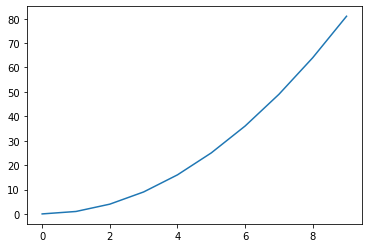

In [6]:
import matplotlib.pyplot as plt

y = [x**2 for x in range(10)]
plt.plot(y);

The expression
```python
y = [x**2 for x in range(10)]
```
is an example of Python list comprehension. It is essentially mimicking mathematical set-builder notation:

$$
y = \{x^2 \mid x\in (0,\dots,9)\}
$$

An equivalent way to write the same thing would be
```python
y = []
for x in range(10):
    y.append(x**2)
```

We can add titles and axis labels to the plot, as well as change it's size like this:

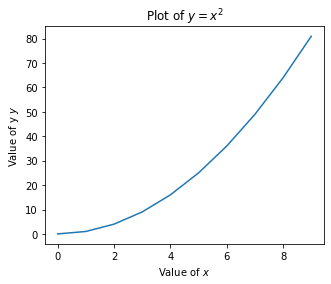

In [7]:
plt.figure(figsize=(5,4))
plt.title("Plot of $y=x^2$")
plt.xlabel('Value of $x$')
plt.ylabel('Value of y $y$')

y = [x**2 for x in range(10)]
plt.plot(y);

Note that using `range` we can only create sequences of integers. In general, when we're working with arrays we do not want to use the Python standard library, but instead we will use `numpy`. This is a very widely used library for numerics in Python. 

A lot of functions in `numpy` have similar names to equivalent functions in Matlab, so if you're used to Matlab the transition shouldn't be difficult. The biggest difference is that the indices of Matlab arrays start with 1, but in Python they start with 0. 

For example, below we create an array with 10 000 values between -5 and 5.

In [8]:
import numpy as np

x = np.linspace(-5,5,10000)
x

array([-5.       , -4.9989999, -4.9979998, ...,  4.9979998,  4.9989999,
        5.       ])

Now `x` is a numpy array. Applying functions to arrays is easy. For example suppose we want to compute

$$y = \exp(-x^2/2)/\sqrt{2\pi}$$

for all these values of `x`, and then plot the result, we can do:

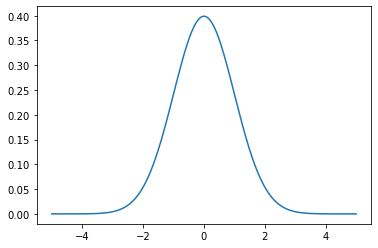

In [9]:
y = np.exp(-x**2/2)/np.sqrt(2*np.pi)

plt.plot(x, y);

Numpy has very good documentation, which you can find [right here](https://numpy.org/doc/1.20/) 

In general for homework exercises where you will need to write code, we will tell you which functions you might need to use. Therefore you don't need to worry if you don't (yet) know how to do something in Python.

## CVXPY

This is a class on convex optimization, so we will also be using the convex optimization package `CVXPY`. On Colab this package is already installed, but if you're running Jupyter on your own computer you can install it using `pip` by running the following command in the command line:
```
pip install cvxpy
```

Below is an excellent example taken from the documentation of CVXPY on how to use it to solve a simple problem. Here we create a random $m\times n$ matrix `A`, and a random vector `b` of size $m$. We then want to solve the problem:

$$
    \min_{x\in \mathcal C} \|Ax-b\|^2
$$

where $\mathcal C\subset \mathbb{R}^n$ is the set of constraints 

$$
    \mathcal C = \{(x_1,\dots,x_n)\mid 0\leq x_i\leq 1\, \forall i\}
$$

we use $m=30,\,n=20$.

In [10]:
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A@x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.79109253e-19  2.85112420e-02  2.79973443e-19  3.37658751e-20
 -2.72802659e-19  1.49285011e-01 -9.97212062e-20  8.35373892e-20
  2.46718649e-01  5.78224144e-01 -4.03739462e-19  1.01242860e-03
 -9.28486200e-20  2.26767464e-01 -1.58813677e-19 -8.97232308e-20
 -1.22145726e-19 -1.51509432e-19  1.12060673e-19 -3.48318630e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


## Important tip: restart your runtime

Restart the Jupyter kernel from time to time. On Colab click 'Runtime > Restart runtime'. Sometimes you might accidentally be using a variable you defined earlier, but then removed the code for this variable. This may give unexpected results, so to make sure your code is good execute it again after restarting the runtime. 

Before handing in any homework make sure to restart the runtime and excecute all the cells (Colab: 'Runtime > Restart and run all'). Make sure the output of all the cells is as expected, and that the entire notebook runs without any errors.